In [1]:
# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

# US Border Activity

We use a dataset that contains monthly temporal data for crossings into the US from both the US-Canadian border, and the US-Mexican border. In this notebook we will apply several data analysis approaches to answer questions regarding the data.

In [2]:
replace_dict = {'Border':{'US-Canada Border':'CA','US-Mexico Border':'MX'}}

border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')

border_crossing_full = border_crossing_full.replace(replace_dict)
border_crossing_full[['Month','Year']] = border_crossing_full['Date'].str.split(" ",expand=True)
border_crossing_full = border_crossing_full.drop(['Port Name','Point','Date'],axis=1)
coordless_border_crossing = border_crossing_full.drop(['Latitude','Longitude'],axis=1)

In [3]:
border_crossing_full.shape

(380467, 9)

In [4]:
#groupedState = coordless_border_crossing.groupby('State').agg('first')
#groupedState.head(15)

### 1. Comparing Canadian and Mexican entries


C:\Users\Can\AppData\Local\Temp/ipykernel_39048/1650860967.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


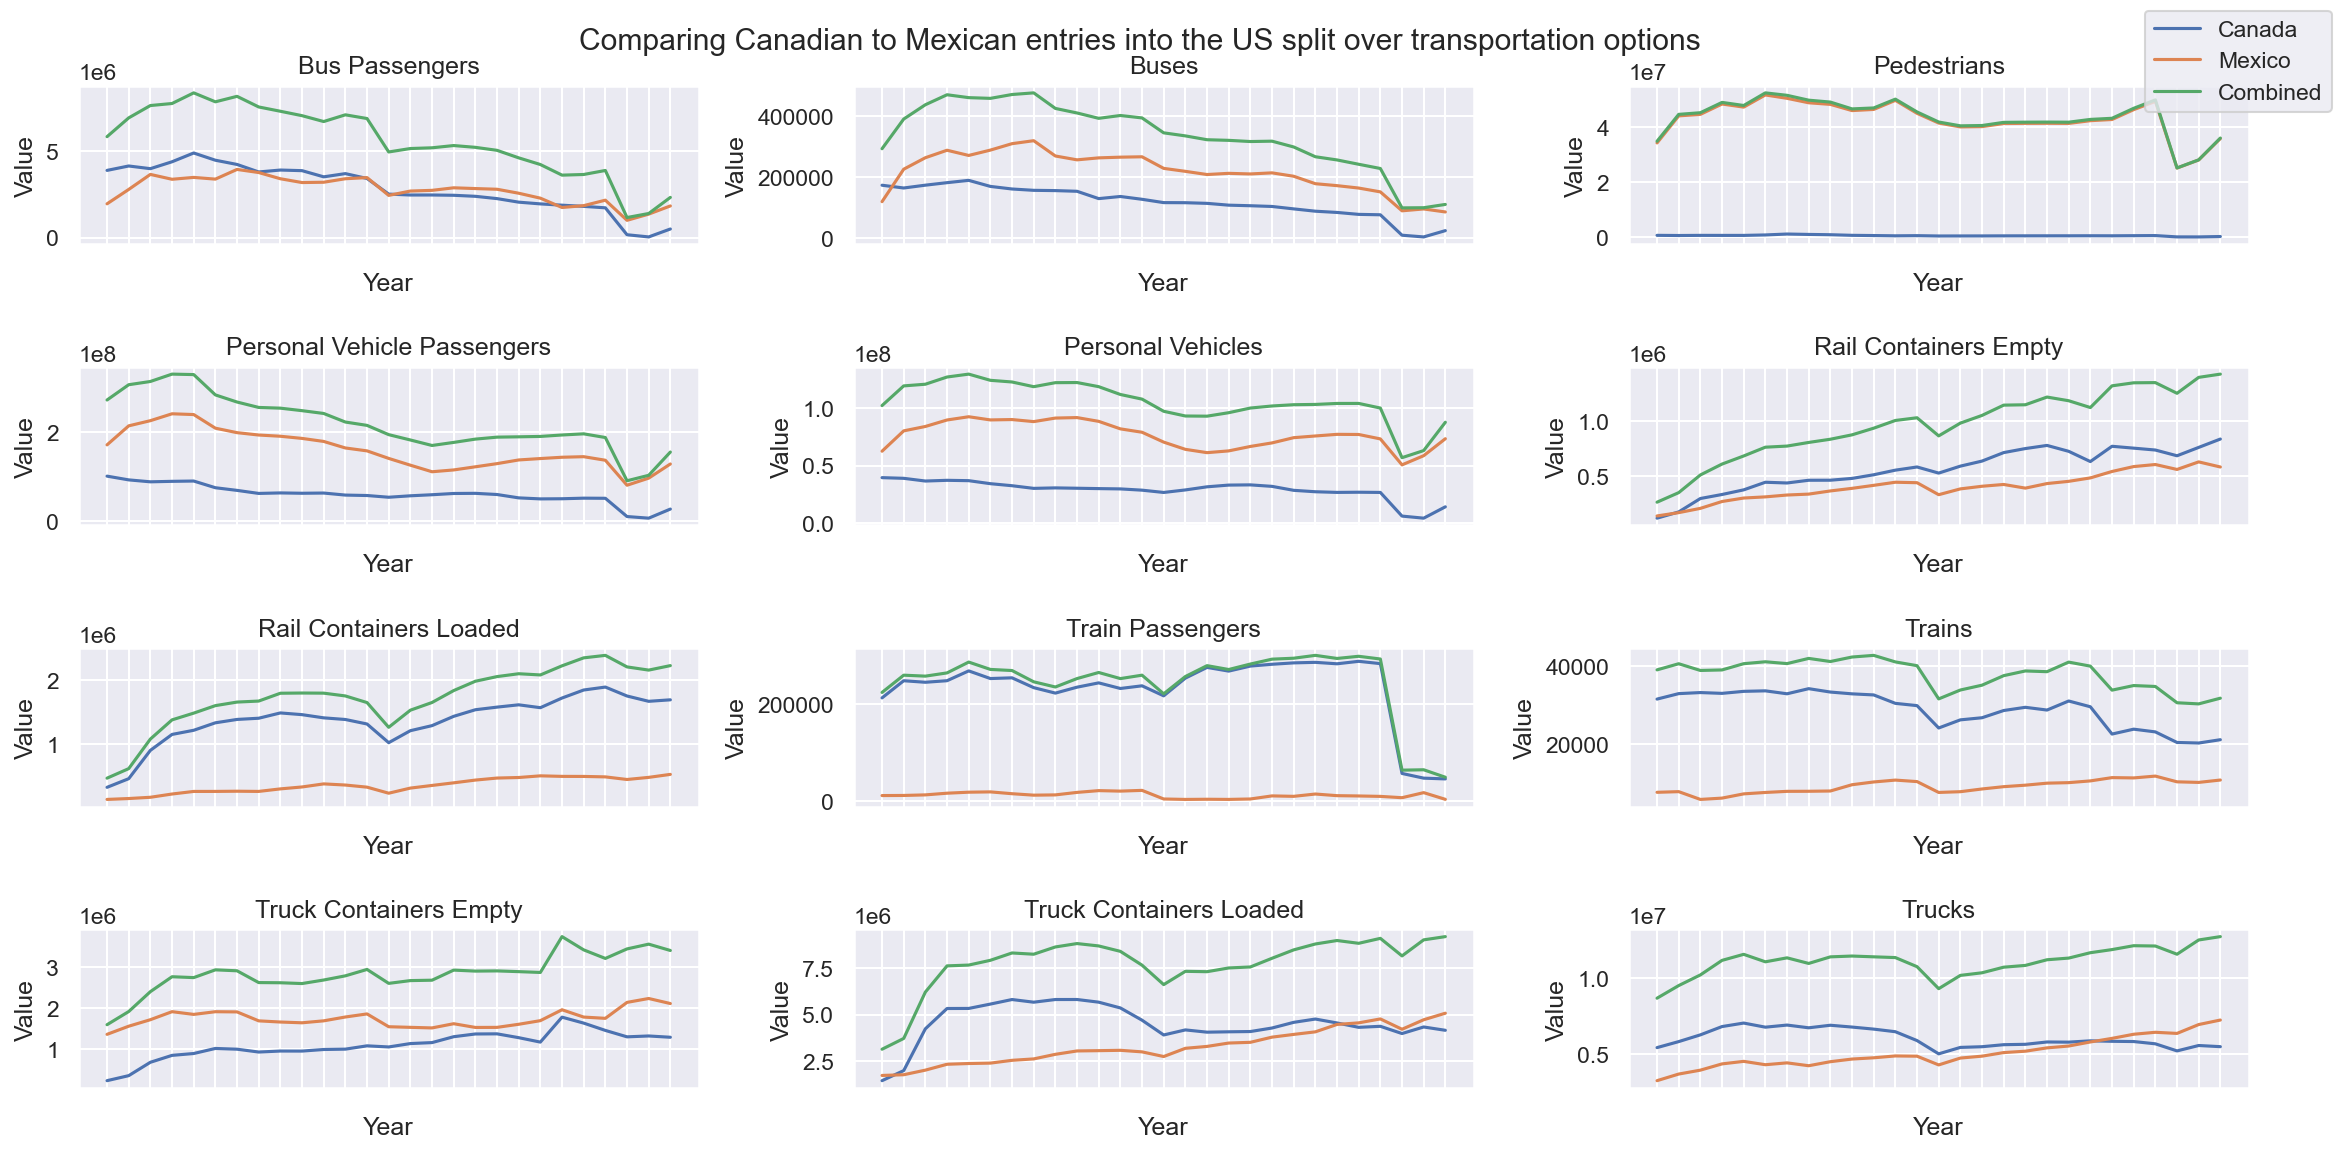

In [5]:
### CODE HERE

canadafilter = border_crossing_full['Border'] == 'CA'
mexicofilter = ~canadafilter

canadacrossings = border_crossing_full.loc[canadafilter]
mexicocrossings = border_crossing_full.loc[mexicofilter]

border_crossing_years = border_crossing_full[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')
canada_activity = canadacrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')
mexico_activity = mexicocrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')

fig, axs = plt.subplots(nrows=4,ncols=3)
fig.tight_layout(pad=3)
ax = sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Canada')
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Mexico').title.set_text('Bus Passengers')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Combined')
ax.set_xticklabels([])  
ax.get_legend().remove()
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1]).title.set_text('Buses')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2]).title.set_text('Pedestrians')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0]).title.set_text('Personal Vehicle Passengers')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1]).title.set_text('Personal Vehicles')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2]).title.set_text('Rail Containers Empty')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0]).title.set_text('Rail Containers Loaded')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1]).title.set_text('Train Passengers')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2]).title.set_text('Trains')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0]).title.set_text('Truck Containers Empty')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1]).title.set_text('Truck Containers Loaded')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2]).title.set_text('Trucks')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2])
fig.legend()
fig.suptitle('Comparing Canadian to Mexican entries into the US split over transportation options')
fig.show()




*** Observations Question 1 ***

### 1.5. How does the mode of transportation change over time


In [6]:
### CODE HERE

*** Observations Question 1.5 ***
<br>
Decline in the use of buses, massive decline in use of trains as transport

### 2. How do the number of entries change between 1996 until now, and how will they change in the future?

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')
border_crossing_monthly = border_crossing_full.groupby('Date').agg(sum)
border_crossing_monthly['date'] = border_crossing_monthly.index
border_crossing_monthly.head()

,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Apr 1996,3041976,35690321,54247.92,-123111.096,Apr 1996
Apr 1997,3041976,38632051,54247.92,-123111.096,Apr 1997
Apr 1998,3041976,42047792,54247.92,-123111.096,Apr 1998
Apr 1999,3041976,43042565,54247.92,-123111.096,Apr 1999
Apr 2000,3041976,44639294,54247.92,-123111.096,Apr 2000


In [9]:
for i in range(0, border_crossing_monthly['date'].shape[0]):
    month, year = border_crossing_monthly['date'].iloc[i].split(" ")
    for j in range(0, 12):
        if month=="Jan":
            month = 1
        if month=="Feb":
            month = 2
        if month=="Mar":
            month = 3
        if month=="Apr":
            month = 4
        if month=="May":
            month = 5
        if month=="Jun":
            month = 6
        if month=="Jul":
            month = 7
        if month=="Aug":
            month = 8
        if month=="Sep":
            month = 9
        if month=="Oct":
            month = 10
        if month=="Nov":
            month = 11
        if month=="Dec":
            month = 12
    date = (int(year)-1996)*12 + month
    border_crossing_monthly['date'].iloc[i] = date
        
border_crossing_monthly.head()

c:\Users\Can\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Apr 1996,3041976,35690321,54247.92,-123111.096,4
Apr 1997,3041976,38632051,54247.92,-123111.096,16
Apr 1998,3041976,42047792,54247.92,-123111.096,28
Apr 1999,3041976,43042565,54247.92,-123111.096,40
Apr 2000,3041976,44639294,54247.92,-123111.096,52


In [10]:
border_crossing_monthly = border_crossing_monthly.sort_values(by=['date'], ascending=True)
border_crossing_monthly.head()

,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Jan 1996,3041976,32550342,54247.92,-123111.096,1
Feb 1996,3041976,32212625,54247.92,-123111.096,2
Mar 1996,3041976,35509073,54247.92,-123111.096,3
Apr 1996,3041976,35690321,54247.92,-123111.096,4
May 1996,3041976,37644486,54247.92,-123111.096,5


<AxesSubplot:xlabel='date', ylabel='Value'>

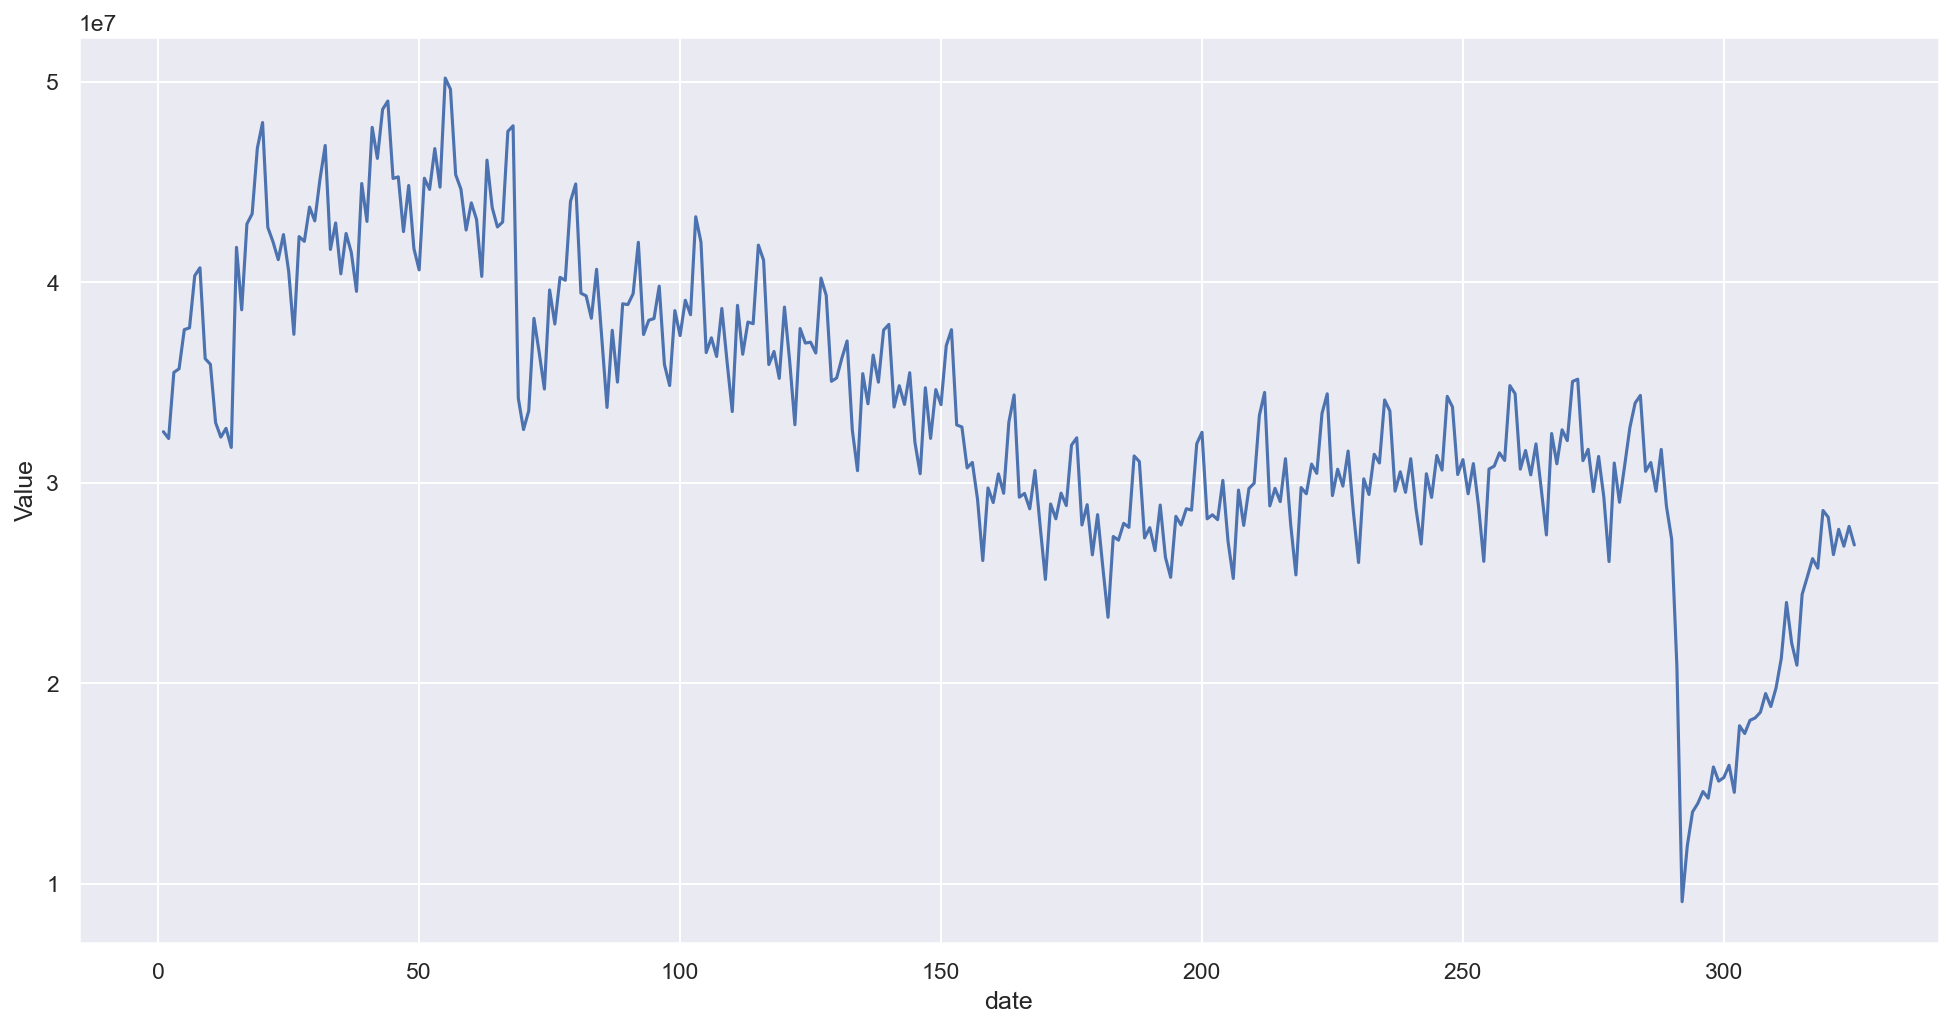

In [11]:
sns.lineplot(data=border_crossing_monthly,x='date',y='Value')

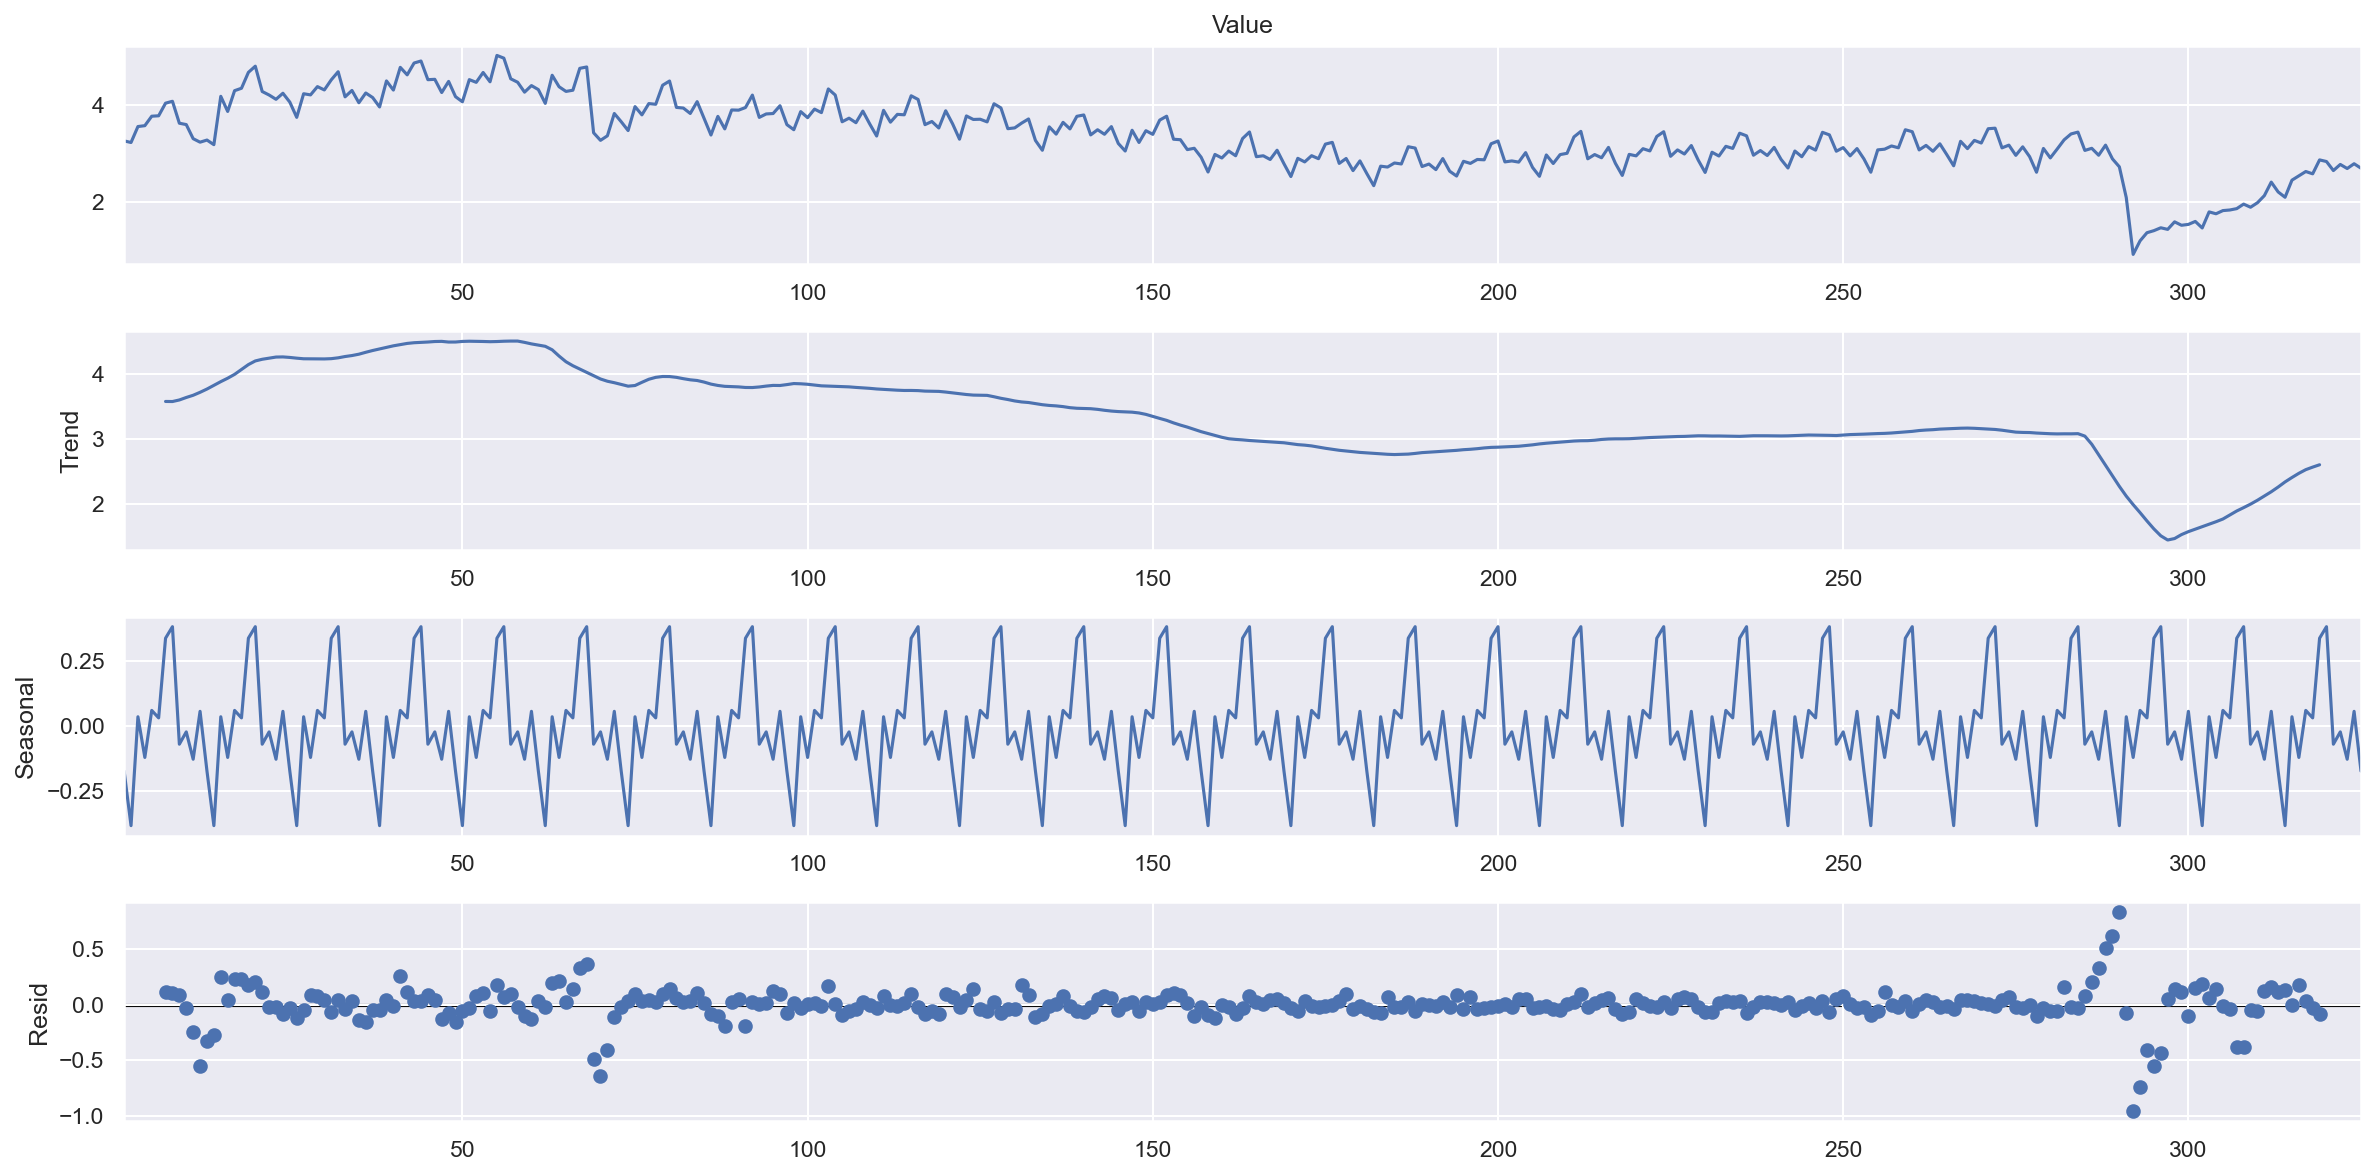

In [12]:
decompfreq = 12
model = 'additive'
 
decomposition = seasonal_decompose(
    (border_crossing_monthly.set_index("date").Value/1e7).interpolate('linear'),
    period = decompfreq,
    model=model)

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

fig = decomposition.plot()
fig.set_size_inches(16, 8)

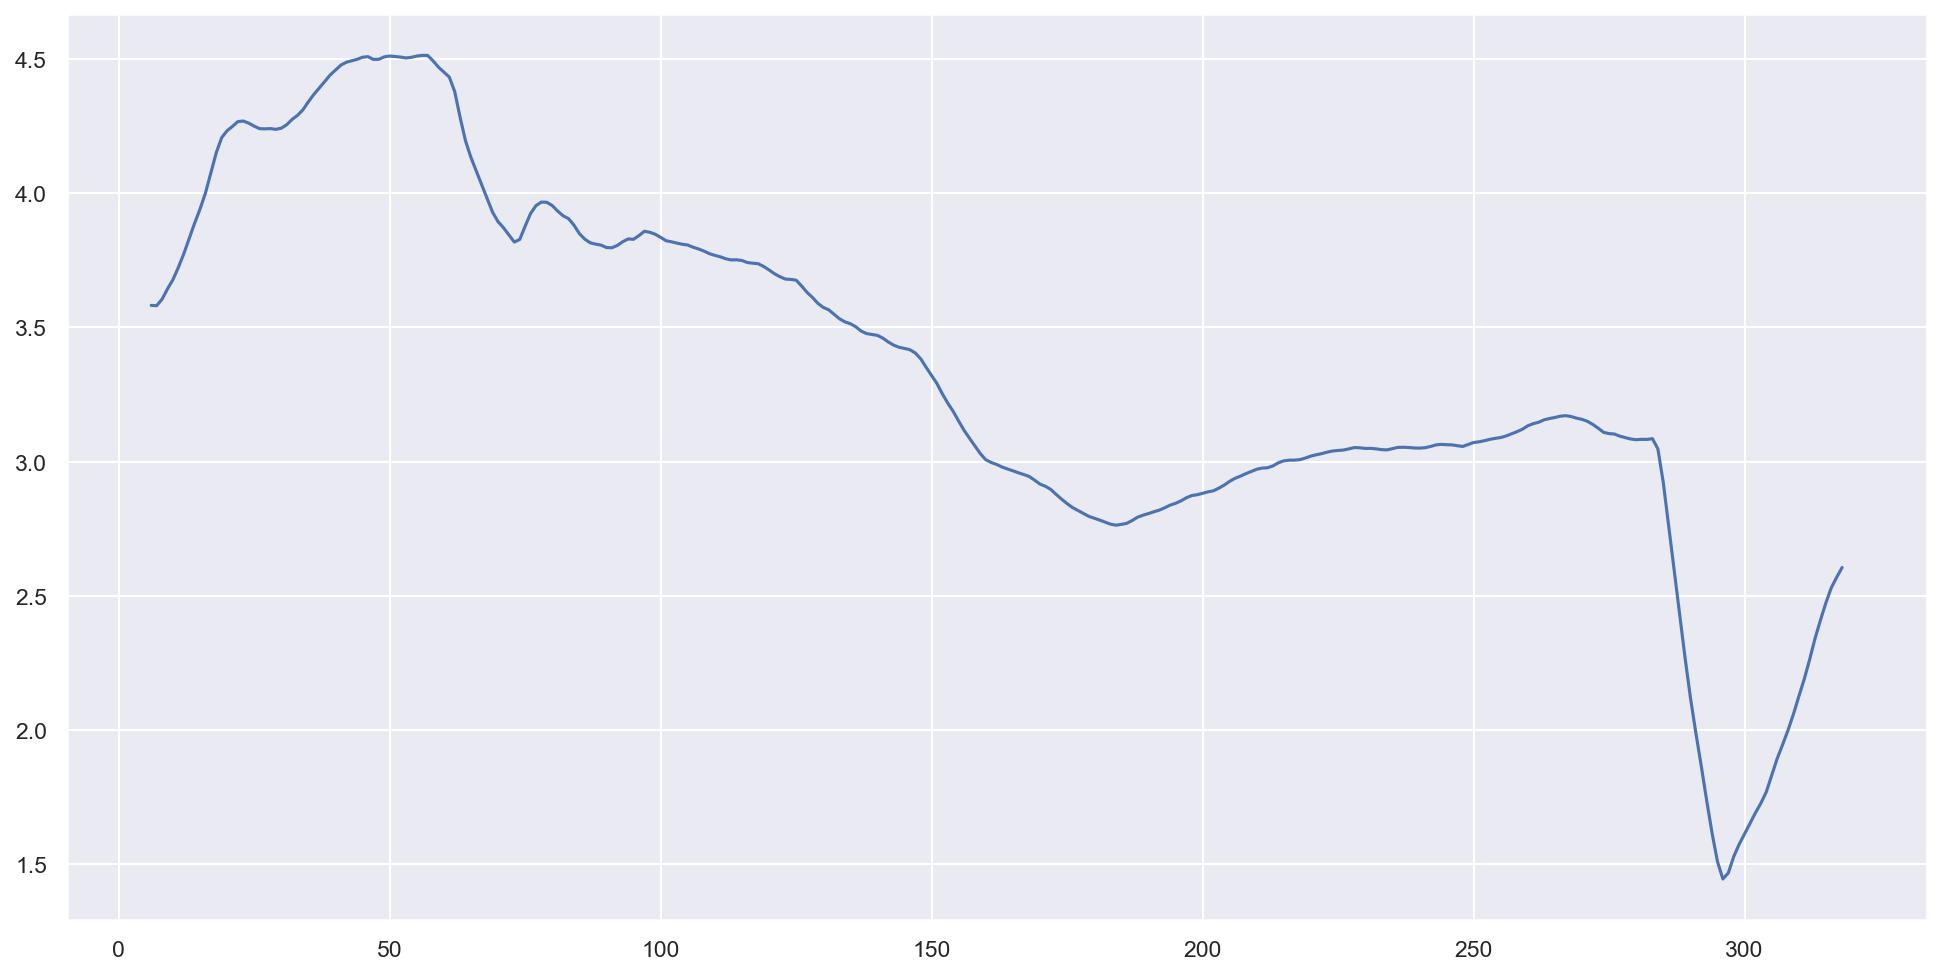

In [13]:
plt.plot(trend.values)

In [14]:
from statsmodels.tsa.stattools import adfuller

def is_stationary_with_adf(data, significance_level=0.05):
    """Decide if the given time series is stationary using ADF test."""
    test = adfuller(data, regression='c', autolag='BIC')
    p_value = test[1]
    print("ADF p-value: {:0.5f}".format(p_value))
    return p_value < significance_level

In [15]:
significance_level = 0.10
print("Significance Level: {}%".format(100 * significance_level), '\n')

print("Stationary by ADF: {}".format(
    "yes" if is_stationary_with_adf(border_crossing_monthly.Value.values, significance_level) else "no"), '\n')

print("Stationary by ADF: {}".format(
    "yes" if is_stationary_with_adf(residual.dropna(), significance_level) else "no"), '\n')

Significance Level: 10.0% 

ADF p-value: 0.36511
Stationary by ADF: no 

ADF p-value: 0.00000
Stationary by ADF: yes 



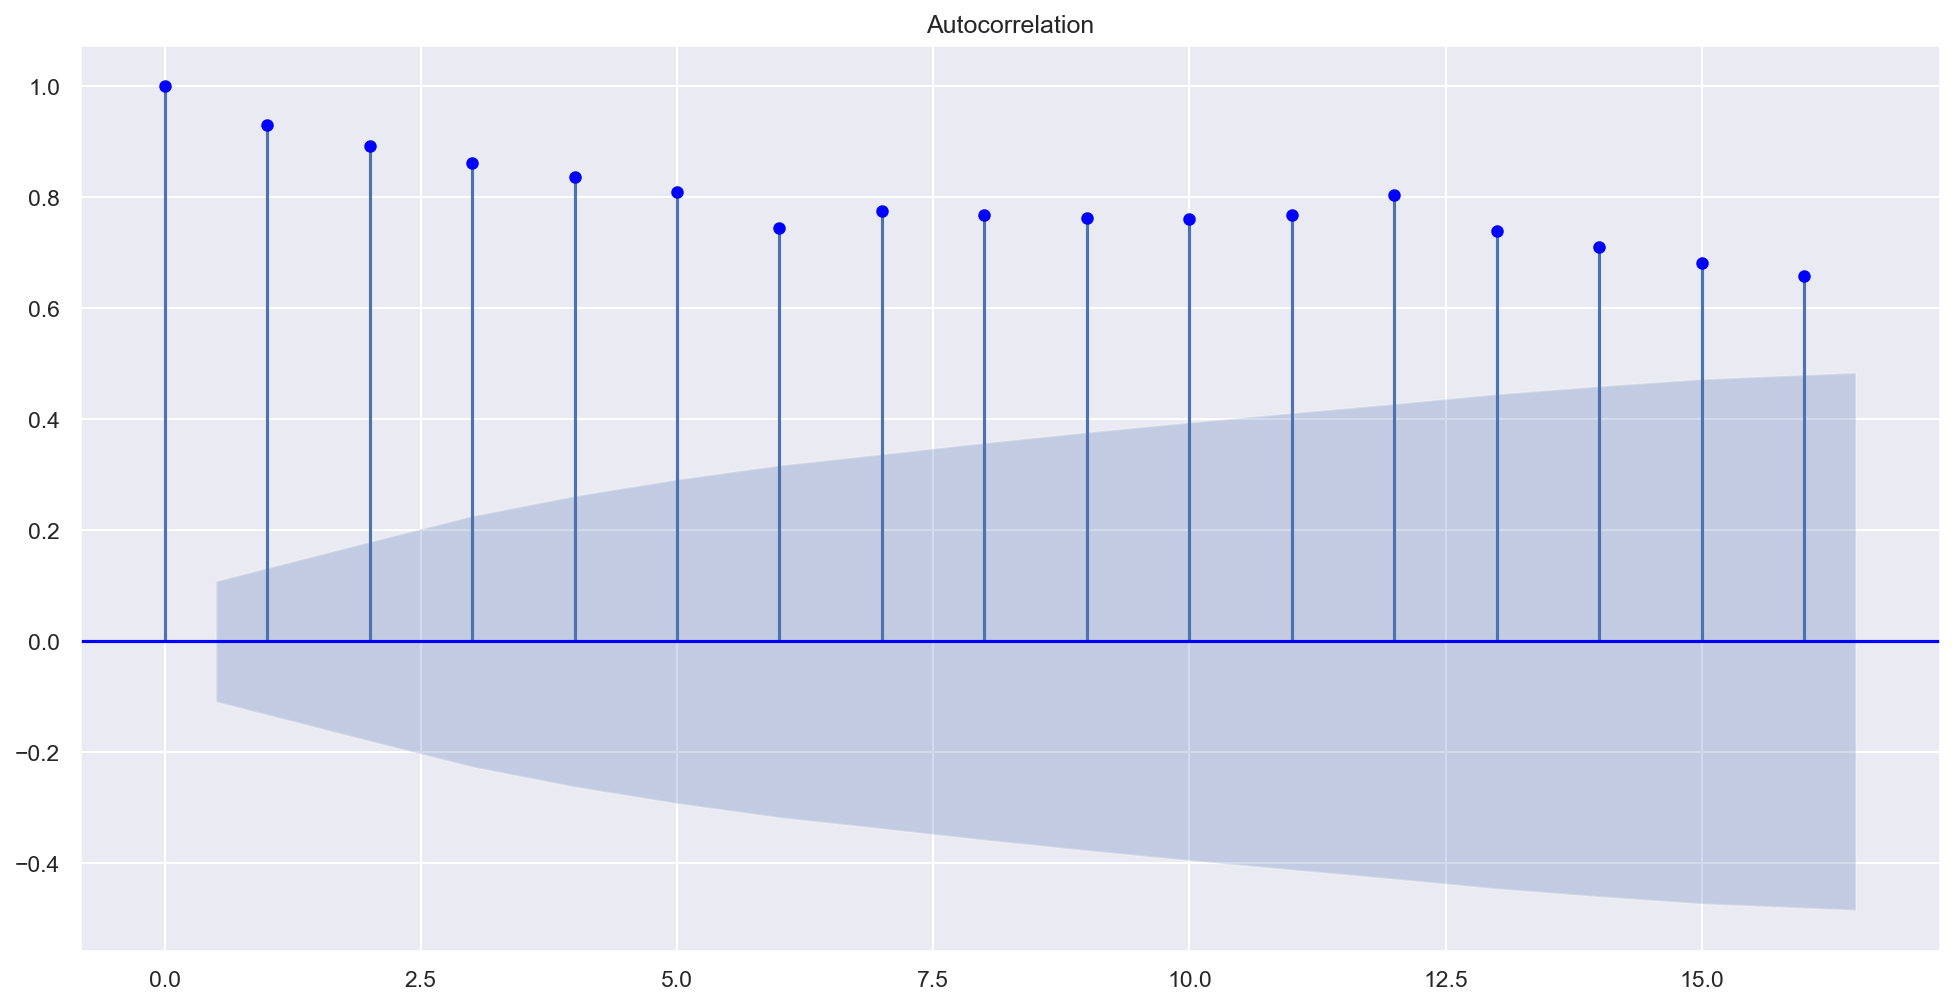

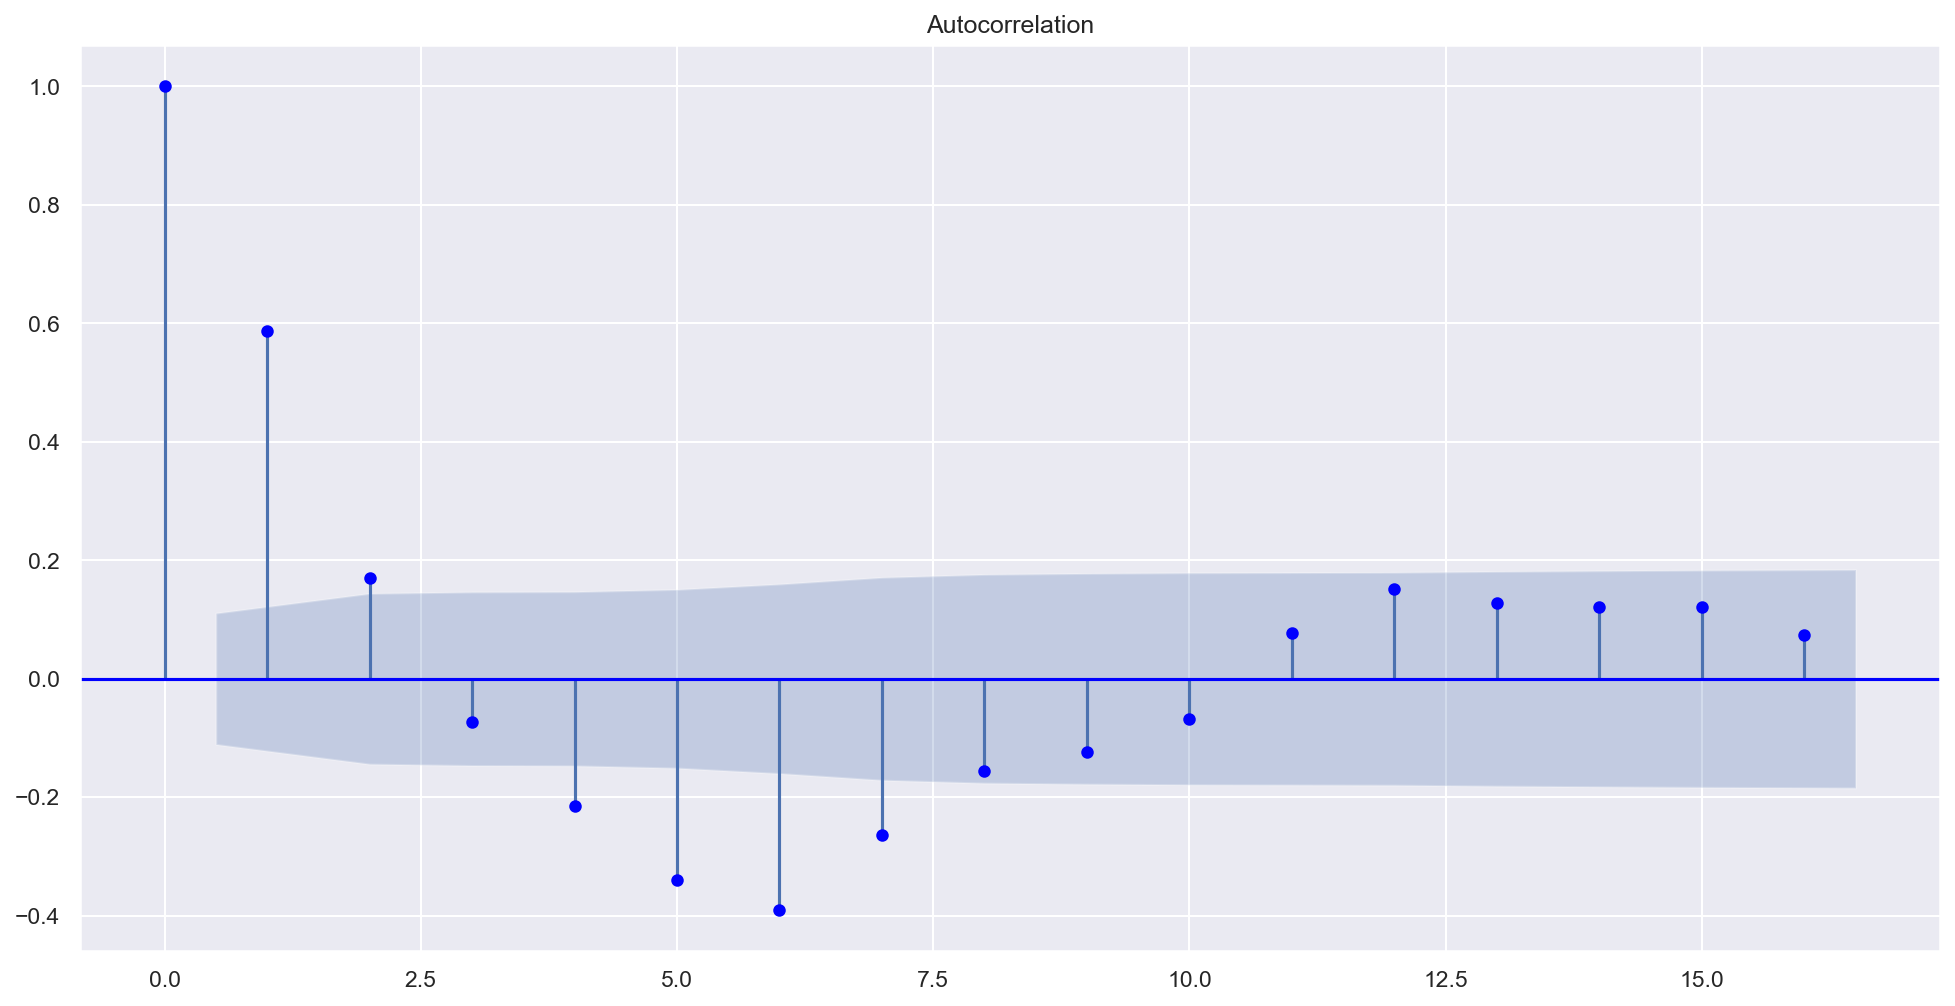

In [16]:
from statsmodels.graphics.tsaplots import plot_acf#, plot_pacf

fig = plot_acf(border_crossing_monthly.Value, color = "blue", lags=16)
fig = plot_acf(residual.dropna(), color = "blue", lags=16)

In [17]:
residual.head(14)

date
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7     0.112382
8     0.108669
9     0.084959
10   -0.028962
11   -0.248901
12   -0.551755
13   -0.327323
14   -0.268735
Name: resid, dtype: float64

In [18]:
border_crossing_monthly["difference"] = border_crossing_monthly.Value - border_crossing_monthly.Value.shift(1)
border_crossing_monthly["stationary"] = border_crossing_monthly.difference - border_crossing_monthly.difference.shift(decompfreq)
border_crossing_monthly = border_crossing_monthly.fillna(0)
border_crossing_monthly.head(14)

,Port Code,Value,Latitude,Longitude,date,difference,stationary
Date,,,,,,,
Jan 1996,3041976,32550342,54247.92,-123111.096,1,0.0,0.0
Feb 1996,3041976,32212625,54247.92,-123111.096,2,-337717.0,0.0
Mar 1996,3041976,35509073,54247.92,-123111.096,3,3296448.0,0.0
Apr 1996,3041976,35690321,54247.92,-123111.096,4,181248.0,0.0
May 1996,3041976,37644486,54247.92,-123111.096,5,1954165.0,0.0
Jun 1996,3041976,37731632,54247.92,-123111.096,6,87146.0,0.0
Jul 1996,3041976,40333161,54247.92,-123111.096,7,2601529.0,0.0
Aug 1996,3041976,40728924,54247.92,-123111.096,8,395763.0,0.0
Sep 1996,3041976,36195902,54247.92,-123111.096,9,-4533022.0,0.0


In [19]:
#function for the visual check of rolling statistics
def visual_check(df, value, seasons, save_to=None):
    #double check this is correct!
    seasonal_mean = df.set_index("date").rolling(seasons).mean().reset_index()
    seasonal_std = df.set_index("date").rolling(seasons).std().reset_index()

    fig, ax = plt.subplots(figsize=(18,6))
    df.plot(x="date", y=value, ax=ax, label="observed", c='lightgrey')
    seasonal_mean.plot(x="date", y=value, ax=ax, label="seasonal (rolling) mean", c='blue')
    seasonal_std.plot(x="date", y=value, ax=ax, label="seasonal (rolling) std", c='green')

    plt.legend(loc='best')
    plt.title('Seasonal Mean & Standard Deviation')
    
    if save_to is not None:
        plt.savefig(save_to)
    plt.show();

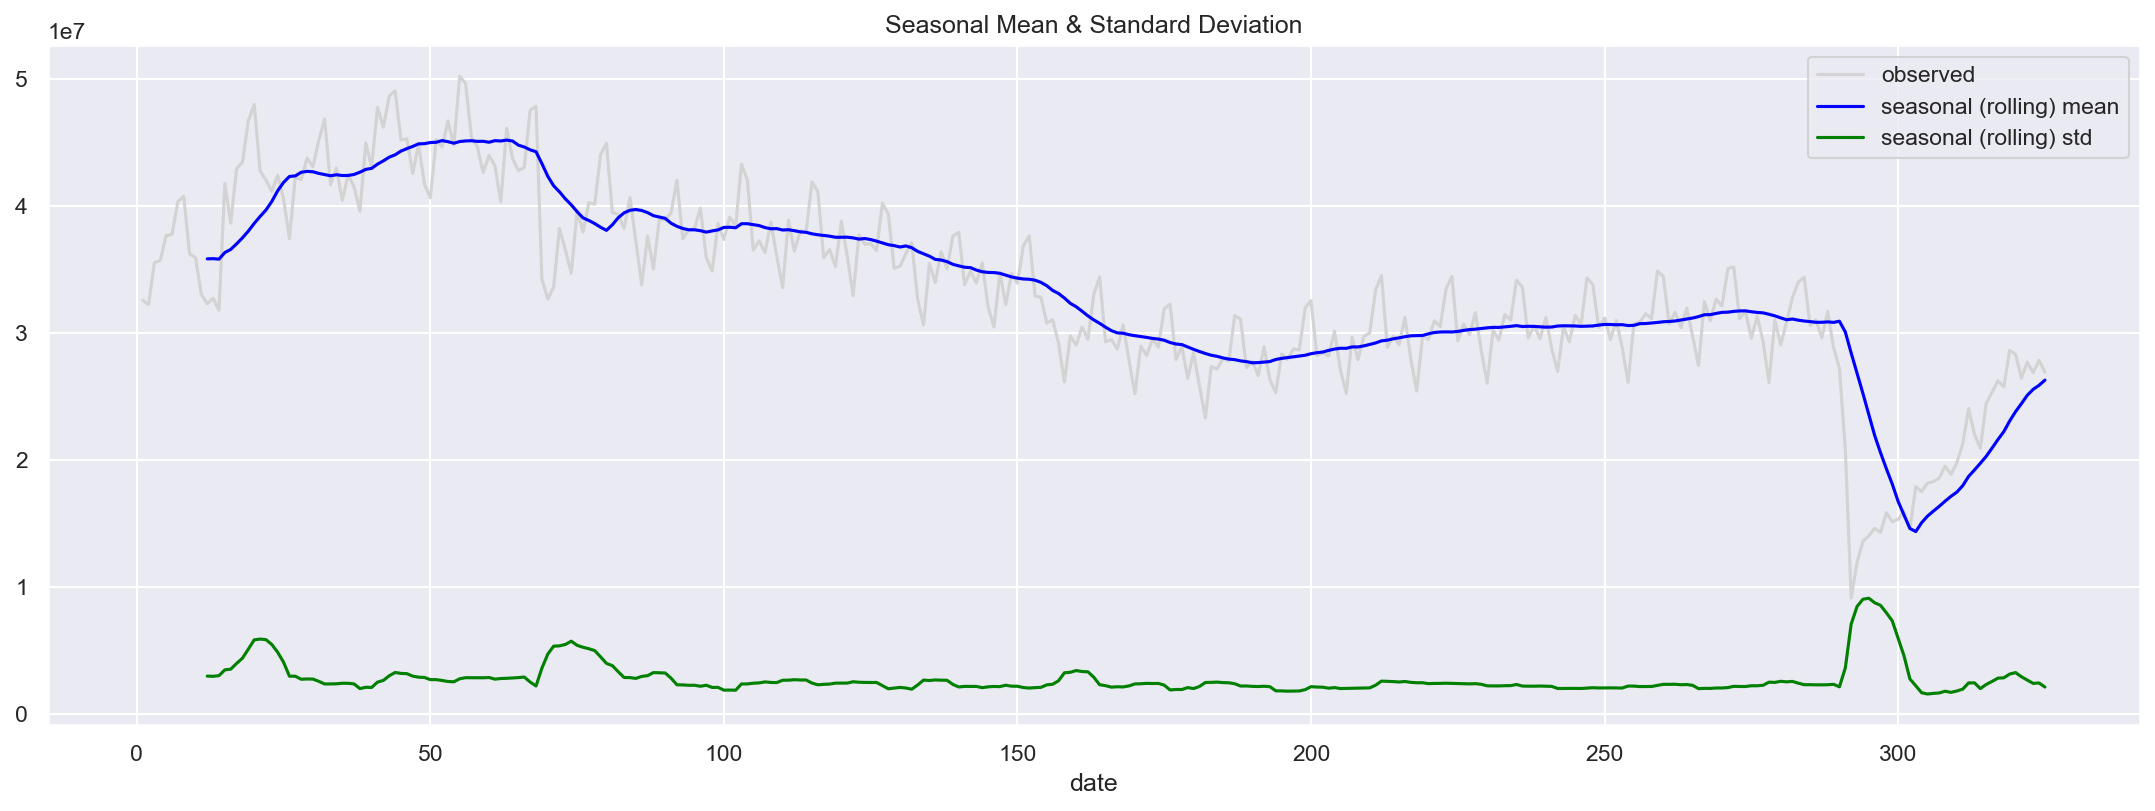

In [20]:
visual_check(border_crossing_monthly, "Value", decompfreq)

In [21]:
border_crossing_monthly["smooth"] = border_crossing_monthly["stationary"].rolling(window = 20, center = False).mean()
border_crossing_monthly.tail()

,Port Code,Value,Latitude,Longitude,date,difference,stationary,smooth
Date,,,,,,,,
Sep 2022,1824112,26417617,33405.662,-75751.217,321,-1866288.0,-1221449.0,1025018.40
Oct 2022,1793650,27680008,32998.176,-74733.673,322,1262391.0,335178.0,1027178.15
Nov 2022,1759783,26839600,32273.487,-73272.477,323,-840408.0,-2308582.0,428225.75
Dec 2022,1765640,27826488,32197.902,-73370.840,324,986888.0,-1809124.0,-229747.20
Jan 2023,1743648,26900650,31649.624,-72179.658,325,-925838.0,1106290.0,-67371.35


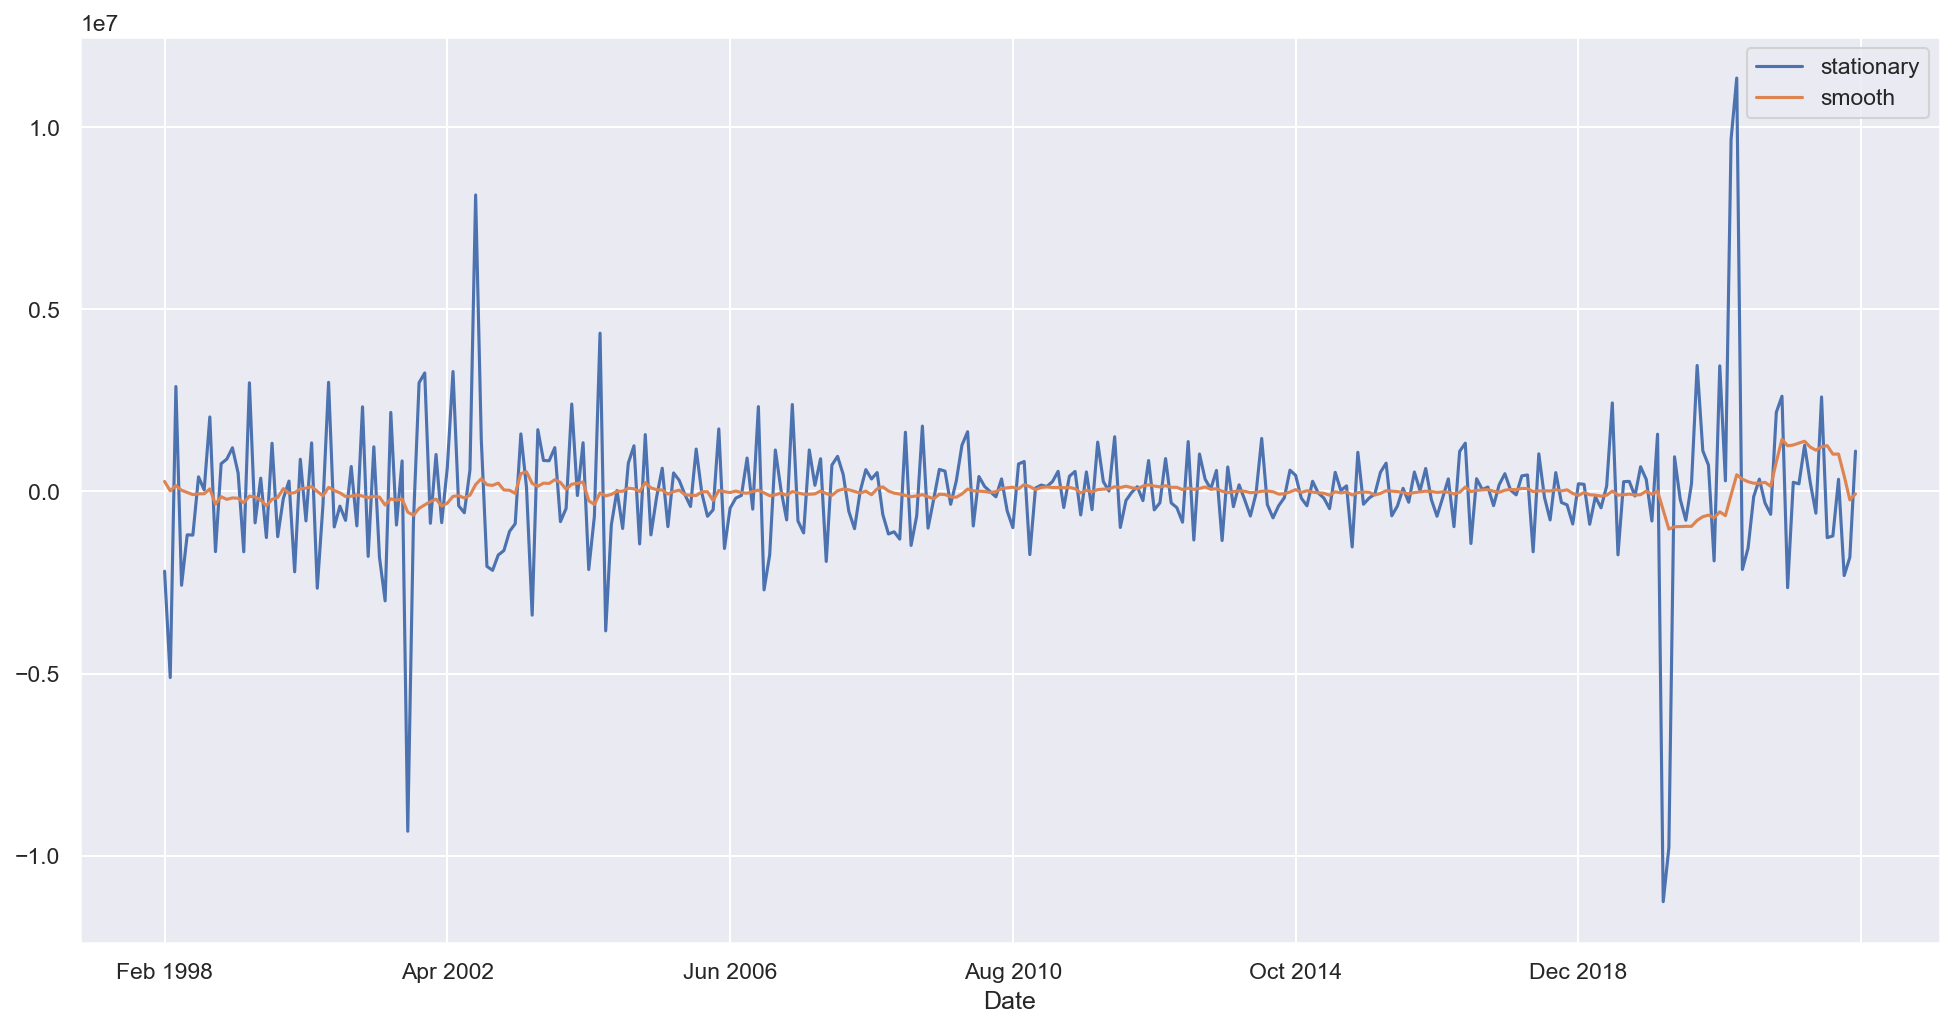

In [22]:
border_crossing_monthly[["stationary", "smooth"]].tail(300).plot(grid = True); 

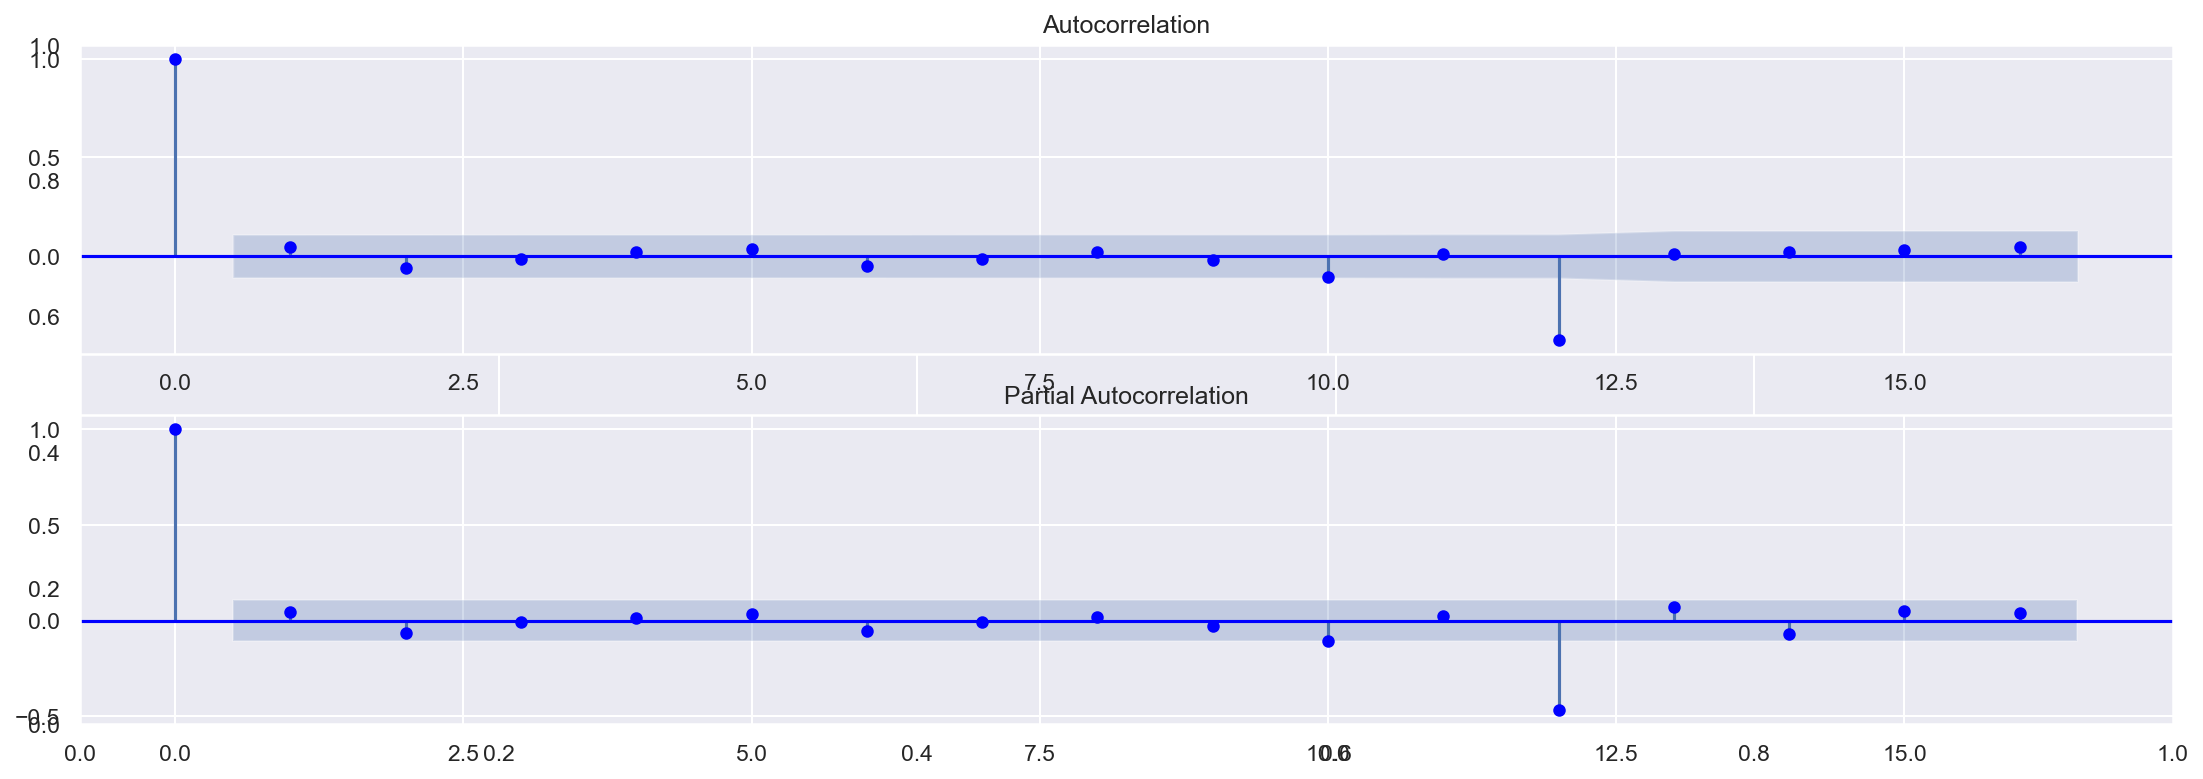

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(18,6))

ax = fig.add_subplot(211)
fig = plot_acf(border_crossing_monthly.stationary.dropna(), color = "blue", lags=16, ax=ax)

ax = fig.add_subplot(212)
fig = plot_pacf(border_crossing_monthly.stationary.dropna(), color = "blue", lags=16, ax=ax)

#plt.savefig('images/stochastic-acf-pacf.png');

In [24]:
split_index = int(border_crossing_monthly['date'].shape[0]*0.80)
train_data = border_crossing_monthly[:split_index]
test_data = border_crossing_monthly[split_index:]

#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace import sarimax

In [25]:
train_data.head()
print(np.log(train_data.Value))

Date
Jan 1996    17.298298
Feb 1996    17.287869
Mar 1996    17.385299
Apr 1996    17.390390
May 1996    17.443697
              ...    
Apr 2017    17.244115
May 2017    17.265397
Jun 2017    17.253264
Jul 2017    17.366532
Aug 2017    17.354857
Name: Value, Length: 260, dtype: float64


In [26]:
model = sarimax.SARIMAX(
    np.log(train_data.Value),
    trend='n', #identifies non-constant trend (other options: c for constant etc.)
    order=(1,1,1),
    seasonal_order=(1,1,1,12), #seasonal component
    enforce_stationarity=True,
    enforce_invertibility=True)

results = model.fit()
print(results.summary())

c:\Users\Can\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\Can\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  260
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 498.372
Date:                            Wed, 29 Mar 2023   AIC                           -986.744
Time:                                    14:35:16   BIC                           -969.197
Sample:                                01-01-1996   HQIC                          -979.680
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5777      0.147      3.927      0.000       0.289       0.866
ma.L1         -0.7414      0.122   

In [27]:
steps = test_data.shape[0]

forecast = results.get_forecast(steps=steps)
forecast_ci = forecast.conf_int()
print(forecast.predicted_mean)
yhat_test = np.exp(forecast.predicted_mean).values

2017-09-01    17.218647
2017-10-01    17.241308
2017-11-01    17.205714
2017-12-01    17.263869
2018-01-01    17.176252
                ...    
2022-09-01    17.207591
2022-10-01    17.229631
2022-11-01    17.193796
2022-12-01    17.251792
2023-01-01    17.163967
Freq: MS, Name: predicted_mean, Length: 65, dtype: float64


In [28]:
print(yhat_test)

[30058226.11860037 30747164.37371975 29671988.48253241 31448723.54203623
 28810547.99515931 26597000.4510268  30707001.20333638 29916912.9651632
 31405342.19789809 30982662.55152254 34326701.22251284 34448631.96599846
 30025177.11980032 30694408.59211716 29613997.9161078  31382309.88247245
 28743777.48813111 26536476.66673383 30632757.82140435 29838883.67270576
 31327685.19101731 30905577.9852745  34239133.36595958 34363522.04576688
 29950752.22696218 30618195.89446159 29540414.90384511 31304297.32203576
 28672287.05739386 26470479.7492775  30556547.90784157 29764616.85364136
 31249735.45890616 30828675.64614072 34153924.15454087 34278018.23556158
 29876226.94670848 30542009.10253617 29466909.62996385 31226402.78105505
 28600941.54484501 26404613.03004374 30480513.64974408 29690552.99266106
 31171976.2714504  30751964.17193957 34068938.34706932 34192723.72392949
 29801885.47132992 30466010.94710416 29393586.6595361  31148701.63525714
 28529773.37411151 26338910.01803125 30404668.509634

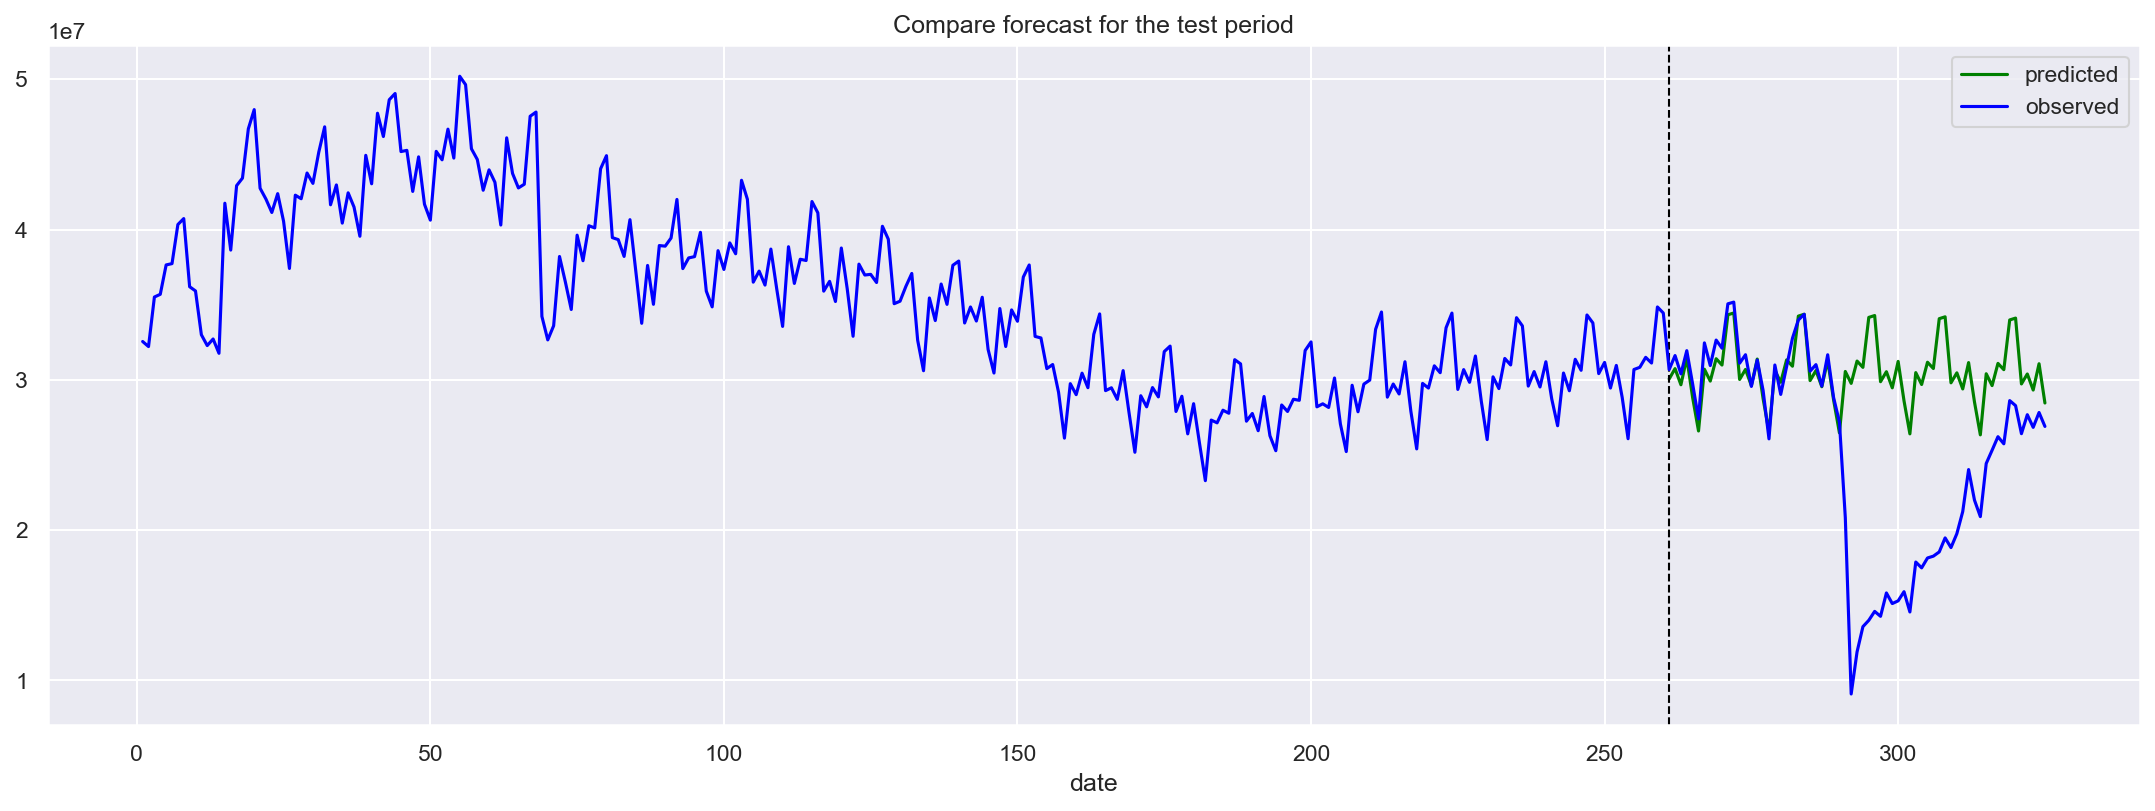

In [29]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(test_data.date.values, yhat_test,
        color="green", label="predicted")

plt.axvline(test_data.date.values[0], c='black', ls='--', lw=1)
border_crossing_monthly.plot(x="date", y="Value", color="blue", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Compare forecast for the test period')

#plt.savefig('images/stochastic-forecast-testrange.png')
plt.show();

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(test_data.Value, yhat_test)
mse = mean_squared_error(test_data.Value, yhat_test)

print("MAE (test): {:0.1f}".format(mae))
print("MSE (test): {:0.1f}".format(mse))

MAE (test): 5941870.8
MSE (test): 76076003516855.3


In [31]:
mae = mean_absolute_error(test_data.Value[:12], yhat_test[:12])
mse = mean_squared_error(test_data.Value[:12], yhat_test[:12])

print("MAE (test): {:0.1f}".format(mae))
print("MSE (test): {:0.1f}".format(mse))

MAE (test): 918139.7
MSE (test): 947098739168.1


general trend: decreasing (with seasonality)
3 trend changing points (2001, 2010, 2020)
slight increase in beginning till 2001

### 2.5. Are there any corrolations between historical events and the entry data?

In [32]:
### CODE HERE

*** Observations Question 2.5 ***

### 3. Does the activity of the most used ports change over time?

<AxesSubplot:xlabel='Port Code', ylabel='Value'>

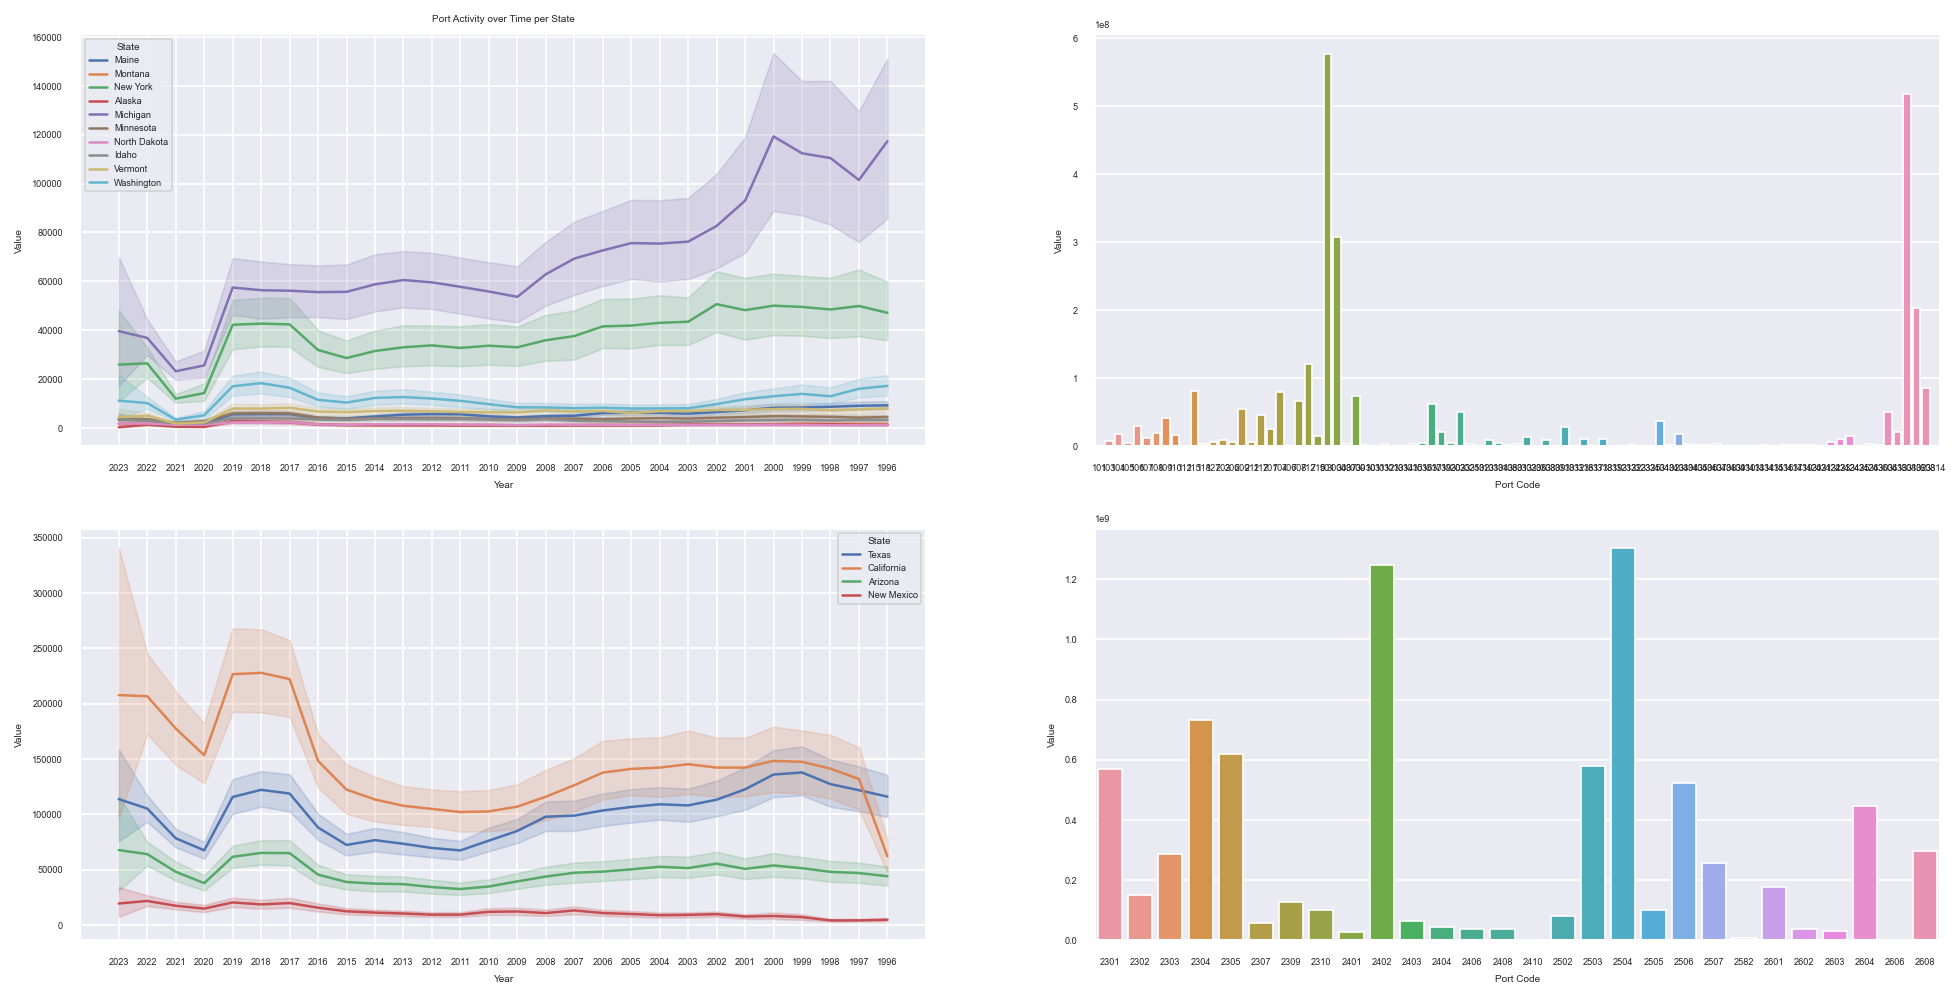

In [47]:
# To find most used find averages
figs, axss = plt.subplots(nrows=2,ncols=2)

portCan = canadacrossings[['State','Port Code','Value']].groupby(['State','Port Code']).agg(sum).reset_index(level=['Port Code'])
portMex = mexicocrossings[['State','Port Code','Value']].groupby(['State','Port Code']).agg(sum).reset_index(level=['Port Code'])

sns.lineplot(data=canadacrossings,x="Year",y="Value",hue="State",ax=axss[0,0]).set(title='Port Activity over Time per State')
sns.lineplot(data=mexicocrossings,x="Year",y="Value",hue="State",ax=axss[1,0])

sns.barplot(data=portCan,x="Port Code",y="Value",ax=axss[0,1])
sns.barplot(data=portMex,x="Port Code",y="Value",ax=axss[1,1])


The most used ports of entry were chosen by looking at the two most popular States and the top 5 most popular individual ports, respective to each country.

From the plots above we can see that the most popular ports in terms of states are:

Canada - Michigan, New York

Mexico - California, Texas

We can now find the most active individual ports.

In [48]:
### CODE HERE
# sumdf1 = canadacrossings[["Port Code","Value"]].copy()
# sumdf2 = mexicocrossings[["Port Code","Value"]].copy()

sumC1 = canadacrossings.loc[(canadacrossings['State'] >= "Michigan") & (canadacrossings['State'] <= "Michigan")]
sumC2 = canadacrossings.loc[(canadacrossings['State'] >= "New York") & (canadacrossings['State'] <= "New York")]
sumM1 = mexicocrossings.loc[(mexicocrossings['State'] >= "California") & (mexicocrossings['State'] <= "California")]
sumM2 = mexicocrossings.loc[(mexicocrossings['State'] >= "Texas") & (mexicocrossings['State'] <= "Texas")]
# aver.append(sumP1["Value"].sum())
print("The total entries from Canada: Michigan -",sumC1["Value"].sum(), " + New York -",sumC2["Value"].sum())
print("The total entries from Mexico: California -",sumM1["Value"].sum(), " + Texas -",sumM2["Value"].sum())

portCanSort = portCan.sort_values("Value",ascending=False)
portMexSort = portMex.sort_values("Value",ascending=False)
print("The popular ports from Canada: ", portCanSort.iat[0, 0]," ",portCanSort.iat[1, 0]," ",portCanSort.iat[2, 0]," ",portCanSort.iat[3, 0]," ", portCanSort.iat[4, 0])
print("The popular ports from Mexico: ", portMexSort.iat[0, 0]," ",portMexSort.iat[1, 0]," ",portMexSort.iat[2, 0]," ",portMexSort.iat[3, 0]," ", portMexSort.iat[4, 0])

The total entries from Canada: Michigan - 806049470  + New York - 884941822
The total entries from Mexico: California - 2845046807  + Texas - 4024501240
The popular ports from Canada:  901   3801   3004   3802   712
The popular ports from Mexico:  2504   2402   2304   2305   2503


This can be represented as:

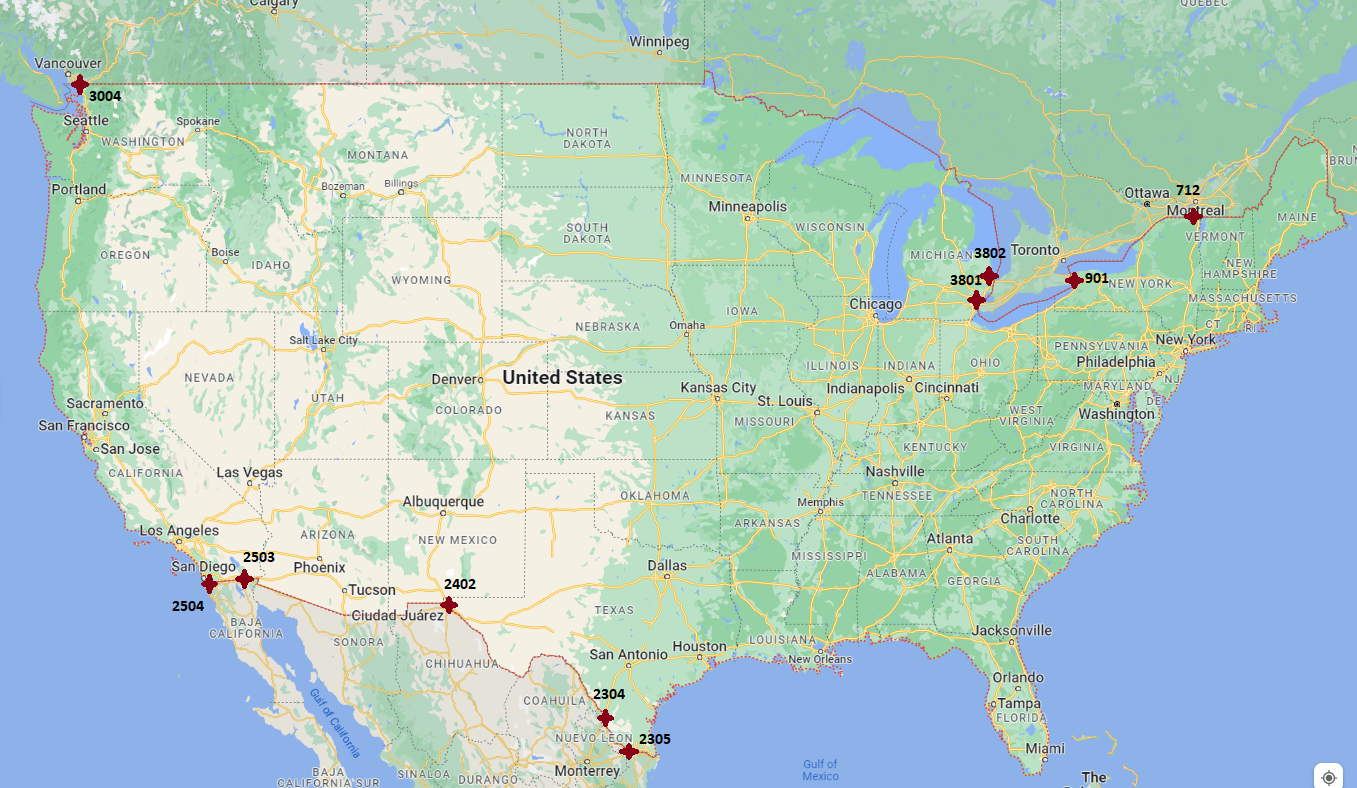

In [49]:
from IPython.display import Image
Image('C:/Users/Can/Desktop/dsai/DA/mappoints.png')

We can now look at how the activity varies over time.

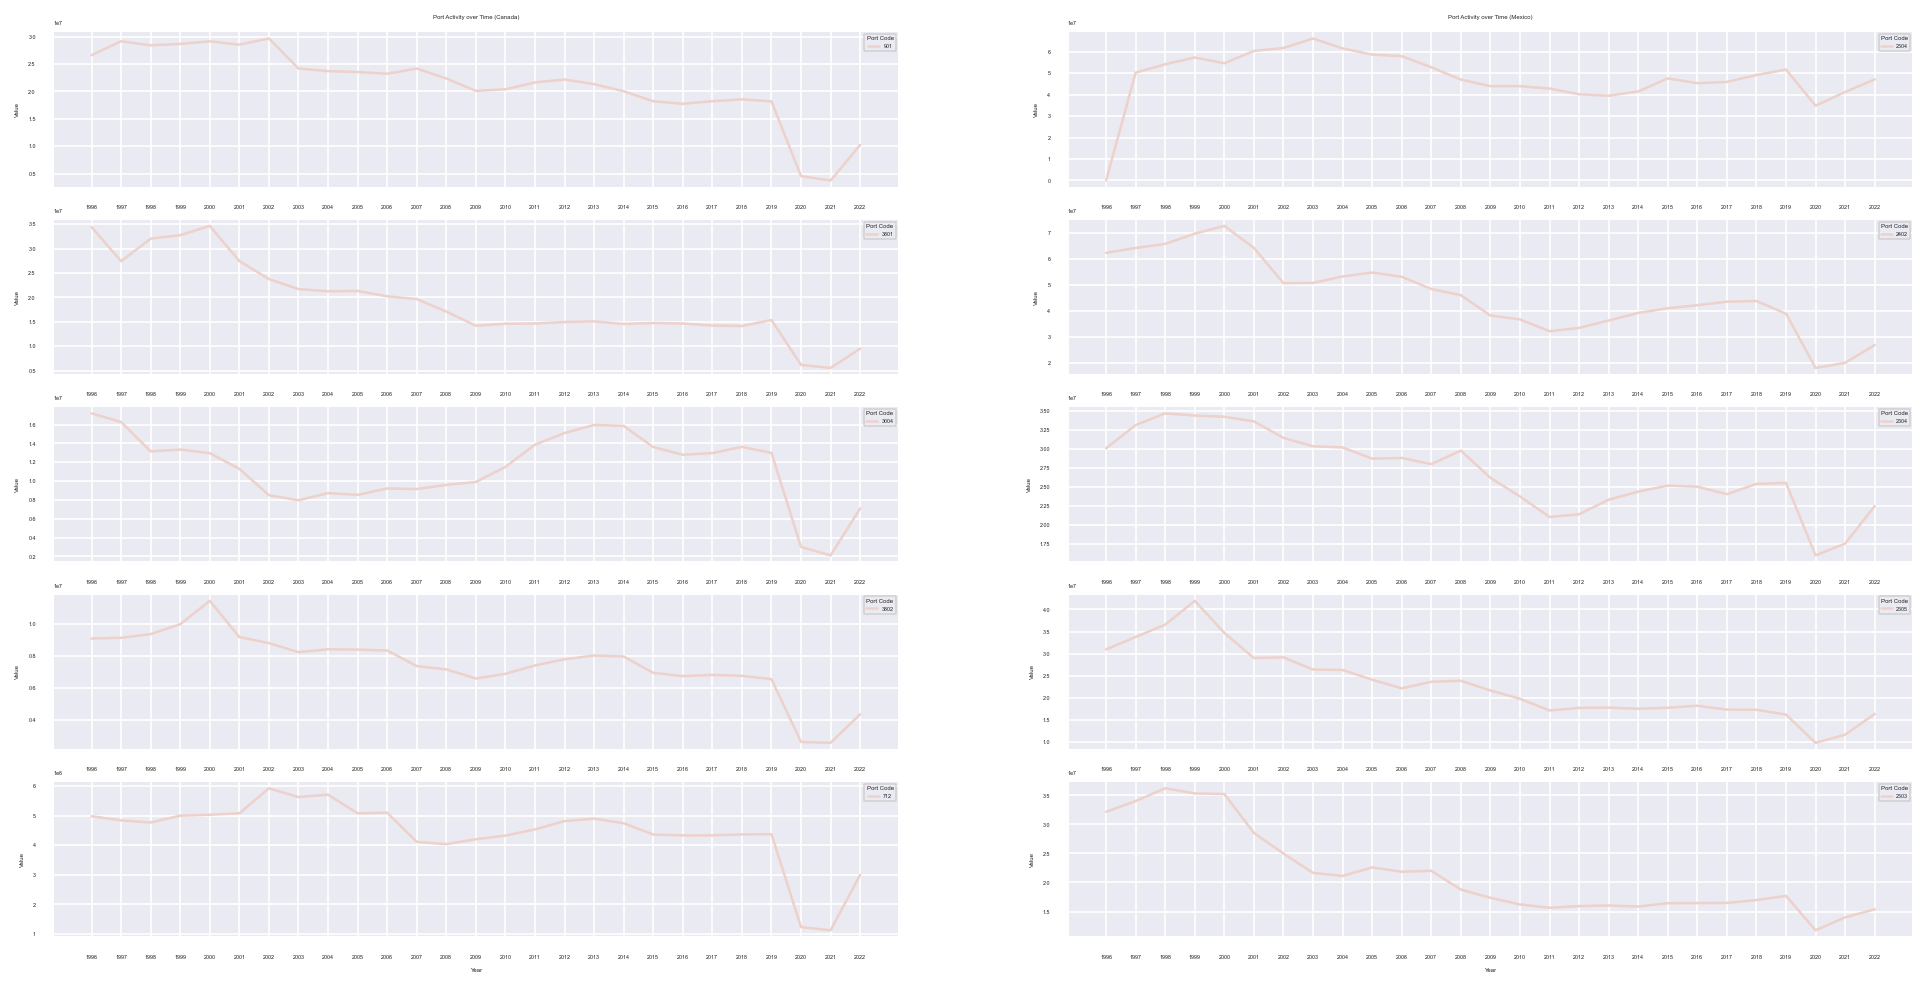

In [57]:
figss, axsss = plt.subplots(nrows=5,ncols=2)
# plt.title("Port Activity over Time")

tPortC = canadacrossings[['Year','Port Code','Value']].groupby(['Year','Port Code']).agg(sum).reset_index(level=['Port Code']).drop(index='2023')
tPortM = mexicocrossings[['Year','Port Code','Value']].groupby(['Year','Port Code']).agg(sum).reset_index(level=['Port Code']).drop(index='2023')

sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 901) & (tPortC['Port Code'] <= 901)],x="Year",y="Value",hue="Port Code",ax=axsss[0,0]).set(title='Port Activity over Time (Canada)')
sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 3801) & (tPortC['Port Code'] <= 3801)],x="Year",y="Value",hue="Port Code",ax=axsss[1,0])
sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 3004) & (tPortC['Port Code'] <= 3004)],x="Year",y="Value",hue="Port Code",ax=axsss[2,0])
sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 3802) & (tPortC['Port Code'] <= 3802)],x="Year",y="Value",hue="Port Code",ax=axsss[3,0])
sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 712) & (tPortC['Port Code'] <= 712)],x="Year",y="Value",hue="Port Code",ax=axsss[4,0])

sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2504) & (tPortM['Port Code'] <= 2504)],x="Year",y="Value",hue="Port Code",ax=axsss[0,1]).set(title='Port Activity over Time (Mexico)')
sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2402) & (tPortM['Port Code'] <= 2402)],x="Year",y="Value",hue="Port Code",ax=axsss[1,1])
sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2304) & (tPortM['Port Code'] <= 2304)],x="Year",y="Value",hue="Port Code",ax=axsss[2,1])
sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2305) & (tPortM['Port Code'] <= 2305)],x="Year",y="Value",hue="Port Code",ax=axsss[3,1])
sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2503) & (tPortM['Port Code'] <= 2503)],x="Year",y="Value",hue="Port Code",ax=axsss[4,1])

sns.set_context("paper", font_scale=0.4) 

*** Observations Question 3 ***
From these plots, we can see that there is a general trend in the 

2001, 2008, 2019